In [1]:
from pathlib import Path
from aicsimageio import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.transform import resize

In [19]:
# Load png images from ./regeneration/ folder
# and convert to numpy array
data_dir = Path("../data/development&regeneration/")
image_shape = (128, 128)
images = {}
samples = ["development", "regeneration"]

for sample in samples:
    images[sample] = []
    img_dir = data_dir / sample
    print(img_dir)
    for file in img_dir.glob("*.png"):
        img = imread(file)
        # Mean rgb values
        img = img[0][0][0]
        img = np.mean(img, axis=2)
        # resize img to 128x128
        img = resize(img, output_shape=image_shape)
        images[sample].append(img)
    print(f"Number of images of {sample}: {len(images[sample])}")

..\data\development&regeneration\development
Number of images of development: 18
..\data\development&regeneration\regeneration
Number of images of regeneration: 50


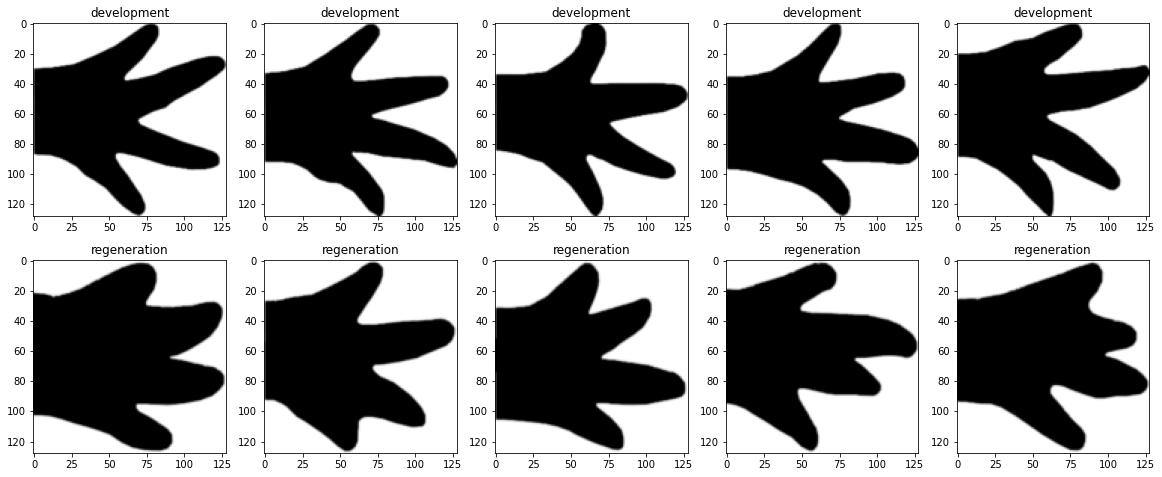

In [30]:
# display some images
n_col = 5
img_size = (4, 4)
fig, ax = plt.subplots(2, n_col, figsize=(img_size[0]*n_col, img_size[1]*2))
for col in range(n_col):
    for row, sample in enumerate(samples):
        ax[row, col].imshow(images[sample][col], cmap="gray")
        ax[row, col].set_title(sample)

## Get mean image and compare between samples

In [37]:
# get mean images of images[sample]
mean_images = {}
for sample in samples:
    mean_images[sample] = np.mean(images[sample], axis=0)

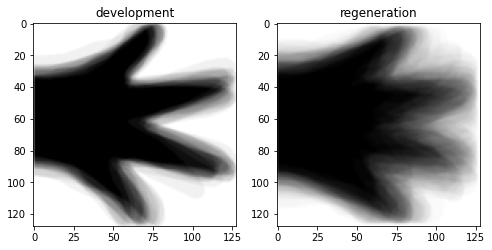

In [39]:
# display mean images
fig, ax = plt.subplots(1, 2, figsize=(img_size[0]*2, img_size[1]))
for row, sample in enumerate(samples):
    ax[row].imshow(mean_images[sample], cmap="gray")
    ax[row].set_title(sample)

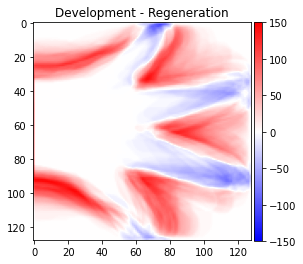

In [61]:
# make difference image
diff_image = mean_images["development"] - mean_images["regeneration"]
fig, ax = plt.subplots(1, 1, figsize=(img_size[0], img_size[1]))
ax.imshow(diff_image, cmap="bwr", vmax=150, vmin=-150)
ax.set_title("Development - Regeneration")
# draw colorbar
cax = fig.add_axes([0.9, 0.12, 0.03, 0.76])
cbar = fig.colorbar(ax.images[0], cax=cax)

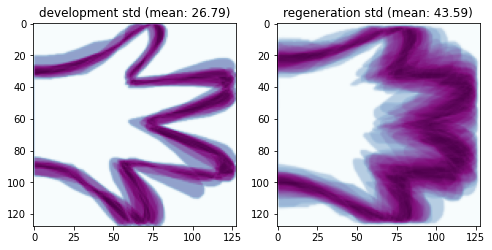

In [64]:
# get std images of images[sample]
std_images = {}
for sample in samples:
    std_images[sample] = np.std(images[sample], axis=0)

# display std images
fig, ax = plt.subplots(1, 2, figsize=(img_size[0]*2, img_size[1]))
for row, sample in enumerate(samples):
    ax[row].imshow(std_images[sample], cmap="BuPu")
    mean_std_val = np.mean(std_images[sample])
    ax[row].set_title(f"{sample} std (mean: {mean_std_val:.2f})")